# Graph of actors

In [106]:
import networkx as nx
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.express as px

## Load preprocessed data

In [74]:
df_movies = pd.read_pickle('../data/generated/preprocessed/movies.pkl')

In [92]:
df_movies['principal_genre']= df_movies['movie_genres'].str.split(',', 1, expand=True)[0]
df_movies

,wiki_id,fb_id,movie_name,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year,principal genre,principal_genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,Thriller
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery,Biographical film,Drama,Crime Drama",2000,Mystery,Mystery
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction,Drama",1988,Crime Fiction,Crime Fiction
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller,Erotic thriller,Psychological thriller",1987,Thriller,Thriller
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983,Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Drama,2011,Drama,Drama
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,"Ireland,United Kingdom","Biographical film,Drama,Documentary",2011,Biographical film,Biographical film
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,"Satire,Comedy",1972,Satire,Satire
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,Japan,"Science Fiction,Japanese Movies,Adventure,Anim...",1992,Science Fiction,Science Fiction


In [76]:
df_actors = pd.read_pickle('../data/generated/preprocessed/characters.pkl')


In [77]:
df_actors

,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/03wcfv7,United States of America
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0346l4,Canada
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/01vw26l,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/034hyc,United Kingdom
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/01y9xg,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0b_vcv,NaN
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0bx7_j,NaN
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,English people,David Hemmings,15.0,/m/0g8ngmc,/m/022g44,England
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,/m/0g8ngmm,NaN


In [104]:
merge_info = pd.merge(df_actors, df_movies, on=["wiki_id"])

,average_women,average_men
principal_genre,,
Thriller,17603,38517
Drama,18886,31804
Crime Fiction,9320,23500
Romantic comedy,9329,12999
Short Film,3937,10375
Romance Film,6269,9762
Action/Adventure,2669,9760
Comedy,4313,8627
Science Fiction,2761,6895


In [79]:
merge_info = pd.merge(df_actors, df_movies, on=["wiki_id"])
#df_actors['local_actor']= merge_info['actor_nationality']==merge_info['movie_countries']
df_actors['local_actor']= merge_info.apply(lambda x: x.movie_countries.find(str(x.actor_nationality)), axis=1).apply(lambda x: False if x < 0 else True)
df_actors[df_actors.actor_nationality.isnull() == False]

groupby =df_actors.groupby('wiki_id')['local_actor'].agg(['mean'])
df_actors['local_rate']= df_actors['wiki_id'].apply(lambda x: groupby.loc[x]['mean'])
df_actors


,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality,local_actor,local_rate
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/03wcfv7,United States of America,True,0.470588
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0346l4,Canada,False,0.470588
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/01vw26l,NaN,False,0.470588
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/034hyc,United Kingdom,False,0.470588
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/01y9xg,United States of America,True,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0b_vcv,NaN,False,0.133333
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0bx7_j,NaN,False,0.133333
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,English people,David Hemmings,15.0,/m/0g8ngmc,/m/022g44,England,False,0.000000
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,/m/0g8ngmm,NaN,False,0.000000


In [80]:
rate_table = pd.merge(df_movies[['wiki_id','movie_release_year']], df_actors[['wiki_id','local_rate']].drop_duplicates(subset=['wiki_id']) , on='wiki_id')


In [81]:
stats_by_year = rate_table.groupby(rate_table['movie_release_year']).apply(lambda x: pd.Series({
        'average_local_rate': x['local_rate'].mean(),
        'std_dev_local_rate': x['local_rate'].std()
    }))
stats_by_year = stats_by_year[stats_by_year.std_dev_local_rate.isnull() == False]
stats_by_year = stats_by_year[stats_by_year.index > 1915]
stats_by_year = stats_by_year[stats_by_year.index < 2013]
stats_by_year

,average_local_rate,std_dev_local_rate
movie_release_year,,
1916,0.664815,0.411289
1917,0.660526,0.422691
1918,0.634268,0.429203
1919,0.681595,0.410156
1920,0.589486,0.439090
...,...,...
2008,0.480392,0.323168
2009,0.481121,0.324440
2010,0.426409,0.329548


Text(0, 0.5, 'Local Actor Rate')

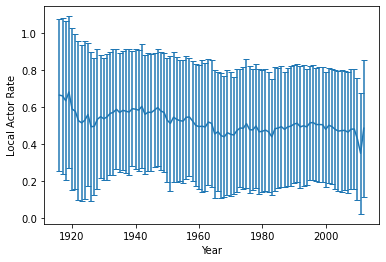

In [82]:
plt.errorbar(stats_by_year.index, stats_by_year.average_local_rate,
             yerr = stats_by_year.std_dev_local_rate,
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Local Actor Rate')

Text(0, 0.5, 'Local Actor Rate')

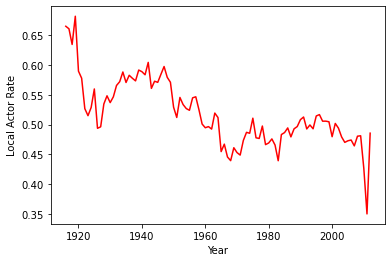

In [87]:
#plt.fill_between(stats_by_year.index, stats_by_year.average_local_rate - stats_by_year.std_dev_local_rate,
#                stats_by_year.average_local_rate + stats_by_year.std_dev_local_rate, alpha = 0.5, color = 'orange')
plt.plot(stats_by_year.average_local_rate, color = 'red')

plt.xlabel('Year')
plt.ylabel('Local Actor Rate')

In [199]:
research_ethnicity= df_actors.dropna(subset='ethnicity')
print('number of ethnicity in total =', len(research_ethnicity))
top_ethnicity= research_ethnicity.groupby(research_ethnicity['ethnicity']).apply(lambda x: pd.Series({
        'number': len(x)
        })).sort_values('number', ascending=False).head(15)
top_ethnicity = top_ethnicity.sort_values('number', ascending=True)

number of ethnicity in total = 48652


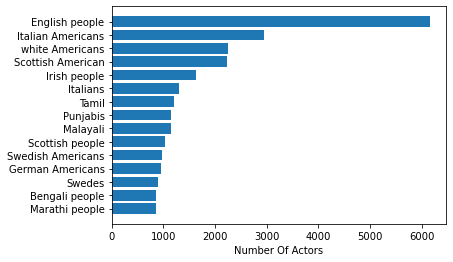

In [201]:
y_pos = np.arange(len(top_ethnicity.index))

plt.barh(y_pos, top_ethnicity.number)
 
plt.yticks(y_pos, top_ethnicity.index)

plt.xlabel('Number Of Actors')
 
plt.show()

In [148]:
top_genres= str(merge_info.groupby(merge_info['principal_genre']).apply(lambda x: pd.Series({
        'average': len(x)
        })).sort_values('average', ascending=False).head(10).index)
top_genres

"Index(['Thriller', 'Drama', 'Crime Fiction', 'Romantic comedy', 'Romance Film',\n       'Short Film', 'Comedy', 'Action/Adventure', 'Science Fiction',\n       'Romantic drama'],\n      dtype='object', name='principal_genre')"

In [168]:
merge_info['principal_genre'].replace('', np.nan, inplace=True)
merge_info = merge_info.dropna(subset='principal_genre')
table_wrt_top_genres = merge_info[merge_info.apply(lambda x: top_genres.find(str(x.principal_genre)), axis=1).apply(lambda x: False if x < 0 else True)]
table_wrt_top_genres= table_wrt_top_genres[table_wrt_top_genres.apply(lambda x: False if x.principal_genre == 'Action' else True, axis=1)]

In [178]:

x= table_wrt_top_genres.groupby(table_wrt_top_genres['principal_genre']).apply(lambda x: pd.Series({
        'number_of_actors': len(x[x['actor_gender'] == 'F'])
        })).sort_values('number_of_actors', ascending=False).head(10)
x = pd.concat([x, (table_wrt_top_genres.groupby(table_wrt_top_genres['principal_genre']).apply(lambda x: pd.Series({
        'number_of_actors': len(x[x['actor_gender'] == 'M'])
        }))).sort_values('number_of_actors', ascending=False).head(10)])


liste = []
for i in range(20):
        liste.append( 'F' if i < 10 else 'M')
x['sex']= liste

x


,number_of_actors,sex
principal_genre,,
Drama,18886,F
Thriller,17603,F
Romantic comedy,9329,F
Crime Fiction,9320,F
Romance Film,6269,F
Comedy,4313,F
Short Film,3937,F
Romantic drama,3743,F
Science Fiction,2761,F


In [184]:
fig = px.bar(x, x="sex", y="number_of_actors", color="sex",
   animation_frame=x.index, animation_group="sex", 
   range_y=[0,20000])
fig.update_layout(
    height=600,
    width= 830,
    title_text='Difference between men and women according to the top10 genre (w.r.t. actors numbers)'
)
fig.show()